In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [2]:
# Пути к изображениям и меткам датасета Dental disease detection.

path_to_data_tr_img = "ML_System_Design/Dental disease detection.v3-dental_disease_detection.yolov5pytorch/train/images/"

tr_images_list = os.listdir(path_to_data_tr_img)

path_to_data_tr_lbl = "ML_System_Design/Dental disease detection.v3-dental_disease_detection.yolov5pytorch/train/labels/"

tr_labels_list = os.listdir(path_to_data_tr_lbl)

In [3]:
print(tr_images_list[:5])
print()
print(tr_labels_list[:5])

['10_jpg.rf.2f40b3406888d0148cceafbe099a5fad.jpg', '10_jpg.rf.a06002eda4c2b736ce8dee762d6e8cac.jpg', '13_jpg.rf.6a8e6d06ce9f7a1c5925c17894e2481e.jpg', '13_jpg.rf.f0e983ff0d5a058bf11d3b656e476098.jpg', '14_jpg.rf.12e0dc09442a51b65c093764f8ce1b41.jpg']

['10_jpg.rf.2f40b3406888d0148cceafbe099a5fad.txt', '10_jpg.rf.a06002eda4c2b736ce8dee762d6e8cac.txt', '13_jpg.rf.6a8e6d06ce9f7a1c5925c17894e2481e.txt', '13_jpg.rf.f0e983ff0d5a058bf11d3b656e476098.txt', '14_jpg.rf.12e0dc09442a51b65c093764f8ce1b41.txt']


In [7]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_tr_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "1":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("out_tr_Dental_disease_detection/" + image_name, img)
        plt.show()
    
    else:
        pass          

[82.75, 528.5, 54.5, 43.0]


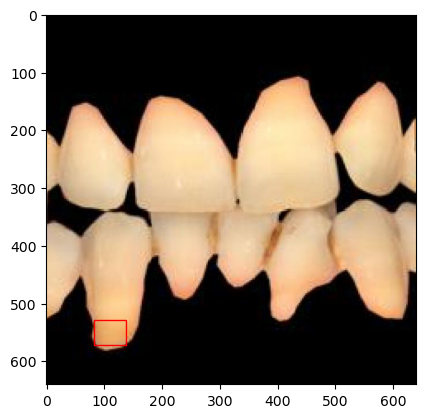

[114.25, 208.75, 48.5, 105.5]
[368.75, 203.0, 25.5, 23.0]
[527.25, 201.0, 64.5, 47.0]


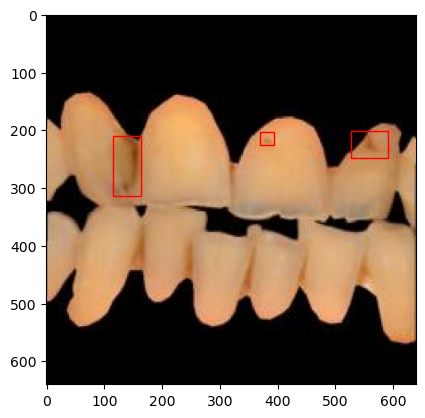

[71.25, 257.0, 74.5, 40.0]


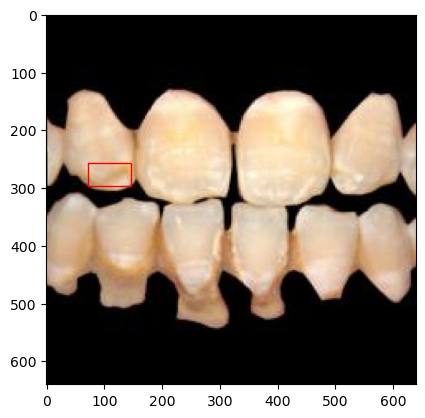

[578.0, 186.5, 12.0, 108.0]


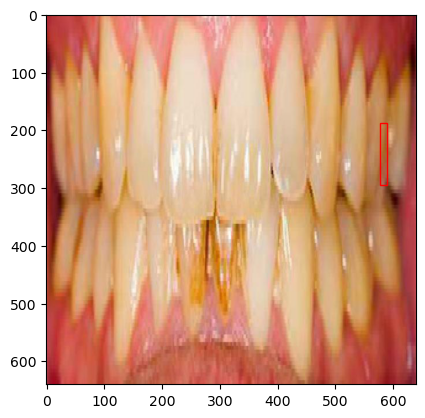

[105.5, 168.5, 23.0, 83.0]
[157.25, 351.75, 25.5, 65.5]
[386.0, 340.0, 17.0, 80.0]
[268.5, 363.0, 20.0, 40.0]


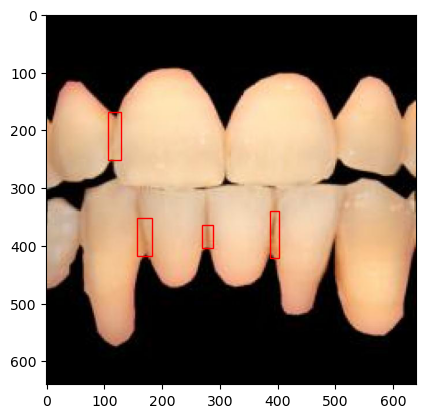

[282.75, 220.25, 34.5, 68.5]
[471.25, 225.75, 31.5, 51.5]
[540.25, 403.0, 45.5, 63.0]
[522.75, 328.5, 14.5, 43.0]


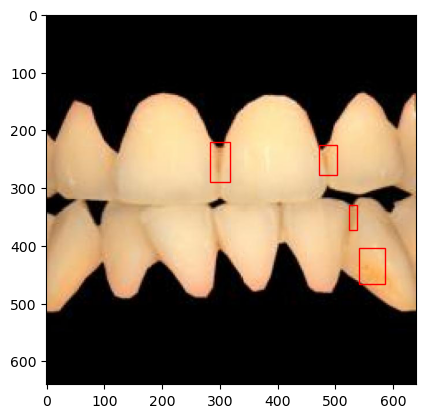

[237.0, 334.25, 23.0, 65.5]


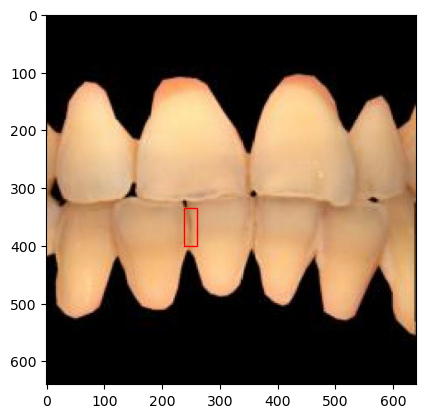

[277.25, 242.75, 28.5, 68.5]
[468.5, 254.5, 23.0, 60.0]
[385.5, 368.5, 20.0, 77.0]
[520.25, 502.75, 45.5, 45.5]
[163.0, 423.0, 23.0, 43.0]


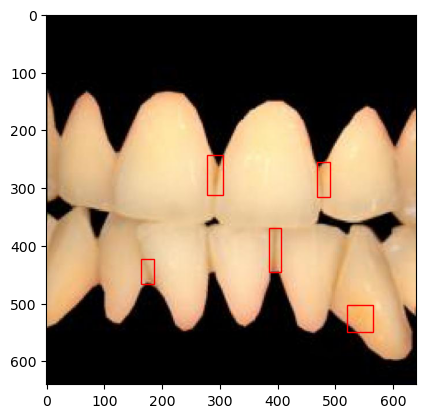

[305.75, 359.75, 28.5, 71.5]


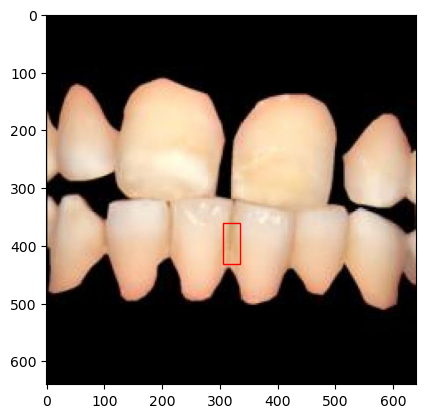

[0.25, 200.0, 28.5, 77.0]


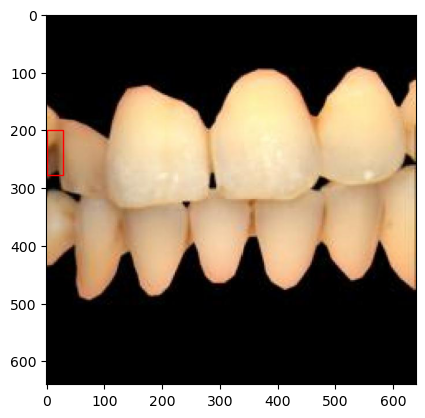

[359.75, 365.75, 31.5, 71.5]
[457.25, 202.75, 28.5, 48.5]


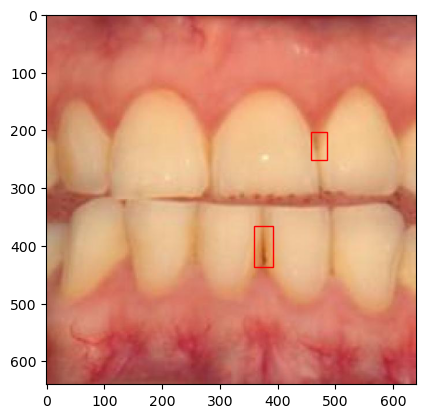

[474.25, 220.0, 28.5, 57.0]
[331.5, 377.25, 20.0, 65.5]
[206.0, 371.5, 37.0, 60.0]


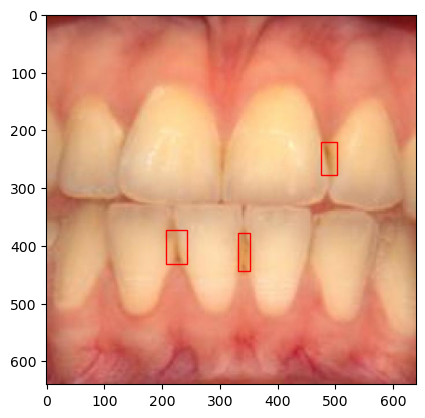

[131.25, 228.5, 28.5, 60.0]
[314.25, 237.0, 25.5, 60.0]
[368.75, 334.5, 45.5, 100.0]
[280.25, 342.75, 25.5, 68.5]
[168.75, 374.25, 31.5, 45.5]
[477.0, 359.75, 43.0, 71.5]


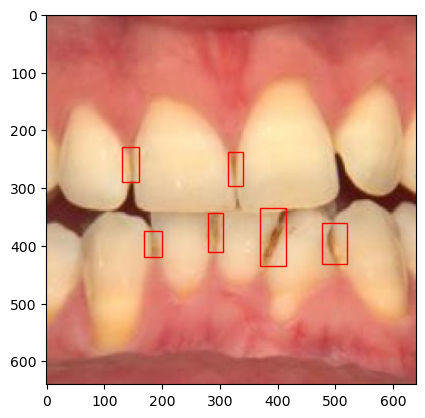

[285.75, 385.5, 34.5, 60.0]
[403.0, 391.5, 17.0, 40.0]
[183.0, 391.25, 20.0, 31.5]


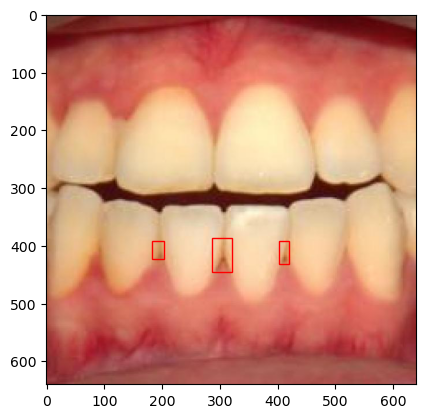

[357.0, 405.5, 37.0, 103.0]
[457.0, 414.25, 43.0, 94.5]


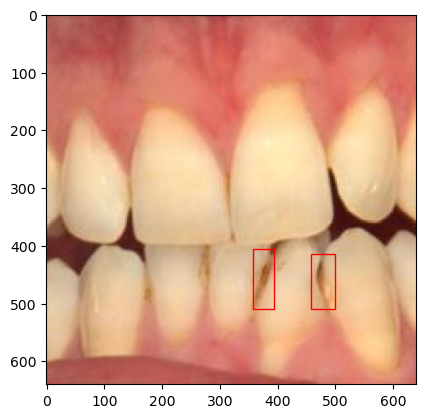

[117.25, 197.0, 51.5, 103.0]
[354.25, 200.0, 71.5, 37.0]
[542.75, 200.25, 45.5, 48.5]


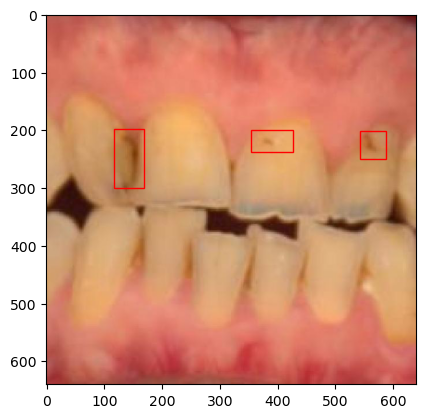

[57.25, 271.25, 88.5, 28.5]


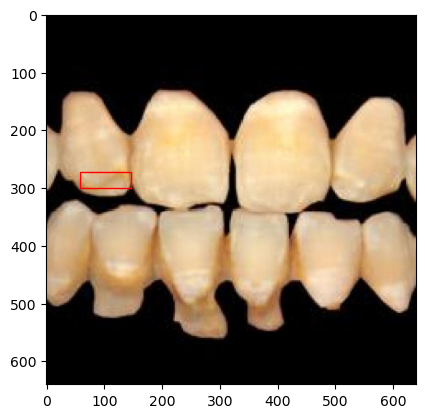

[374.5, 343.0, 37.0, 83.0]
[479.75, 374.25, 31.5, 88.5]
[263.0, 362.75, 23.0, 48.5]


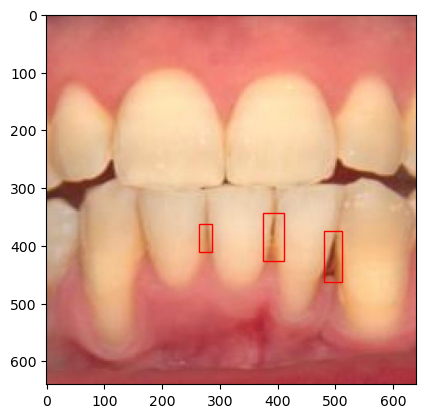

[211.25, 337.25, 28.5, 54.5]
[311.25, 323.0, 31.5, 77.0]
[520.0, 388.75, 37.0, 45.5]
[314.0, 168.5, 23.0, 57.0]


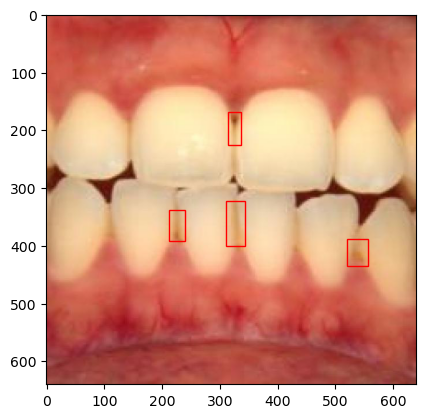

[56.75, 196.25, 34.5, 47.5]


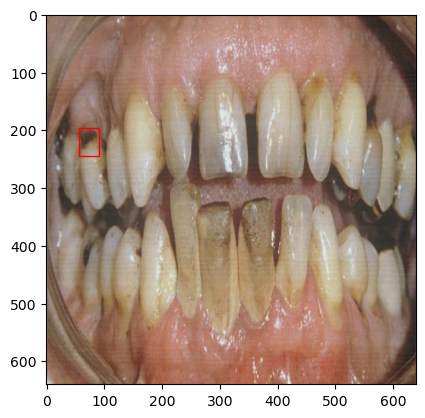

[314.25, 305.5, 28.5, 77.0]


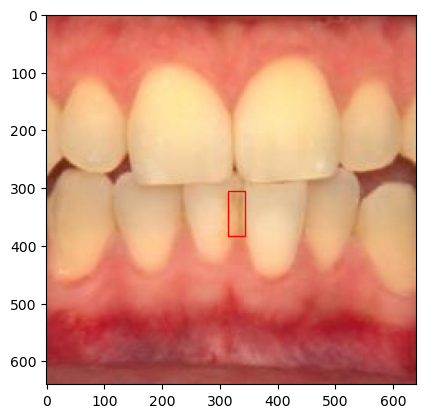

[177.25, 362.75, 31.5, 51.5]
[285.75, 345.75, 25.5, 54.5]
[288.25, 211.25, 34.5, 71.5]
[482.75, 203.0, 25.5, 60.0]
[340.0, 154.25, 120.0, 51.5]


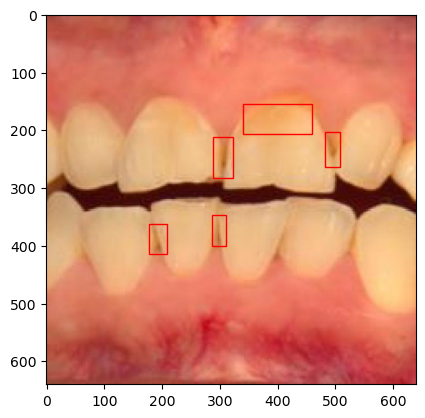

[128.5, 348.5, 37.0, 63.0]
[231.5, 360.25, 37.0, 65.5]
[342.75, 371.25, 28.5, 71.5]
[468.75, 354.25, 28.5, 88.5]
[128.75, 223.0, 28.5, 57.0]


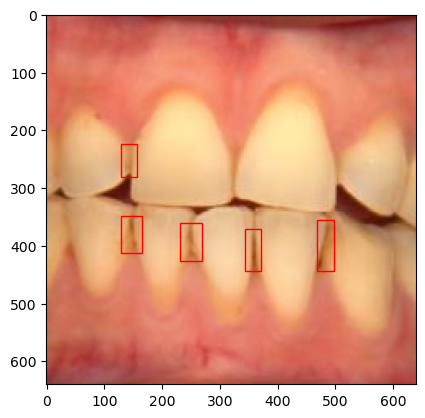

[337.25, 334.25, 31.5, 85.5]


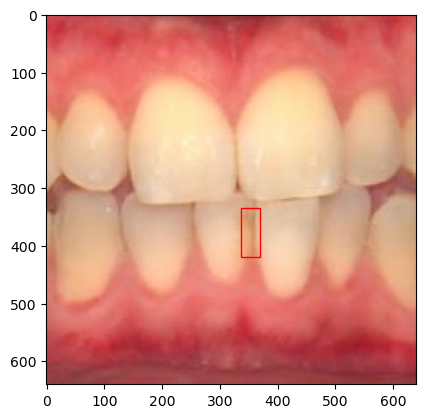

[77.25, 371.5, 48.5, 43.0]
[297.0, 357.0, 37.0, 77.0]


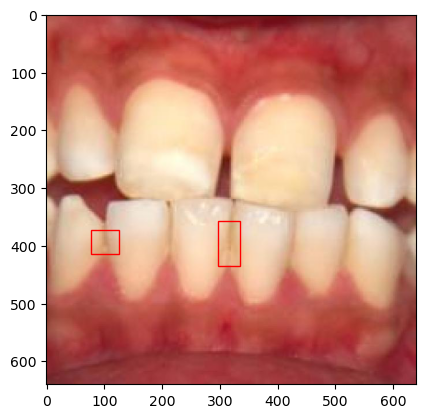

[325.75, 345.75, 45.5, 65.5]
[477.0, 188.5, 40.0, 43.0]
[202.75, 331.75, 31.5, 45.5]


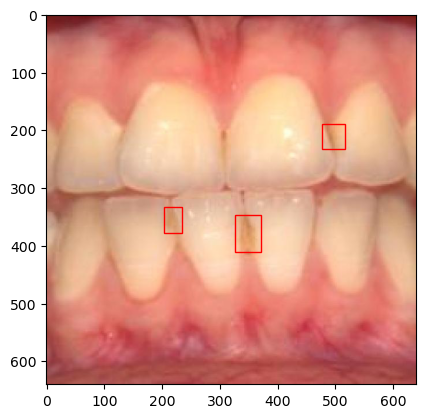

[225.5, 319.75, 40.0, 91.5]
[340.25, 320.0, 25.5, 63.0]
[108.5, 348.5, 40.0, 63.0]
[465.75, 319.75, 25.5, 74.5]
[442.75, 140.0, 48.5, 77.0]


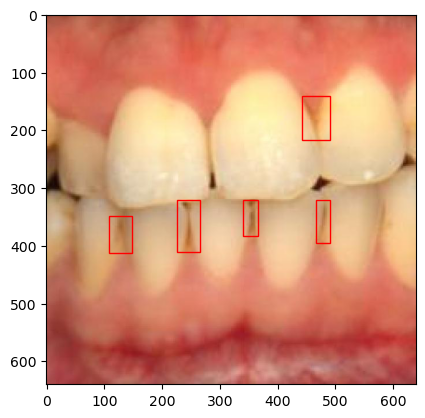

[346.0, 340.0, 37.0, 63.0]
[274.25, 445.75, 88.5, 48.5]
[454.25, 337.0, 31.5, 77.0]
[306.0, 168.5, 37.0, 63.0]


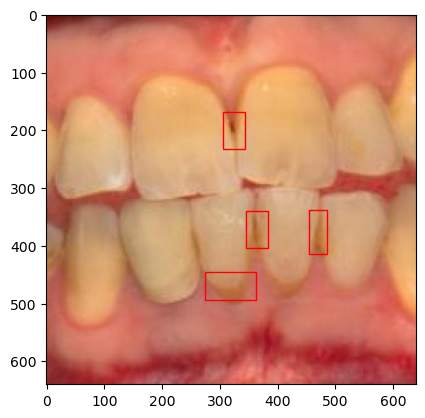

[152.75, 339.25, 21.5, 41.5]
[507.5, 352.25, 20.0, 34.5]
[534.25, 247.75, 22.5, 32.5]


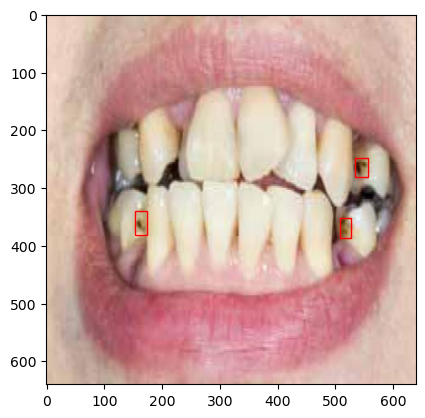

[360.25, 445.75, 28.5, 54.5]
[311.5, 200.25, 37.0, 68.5]


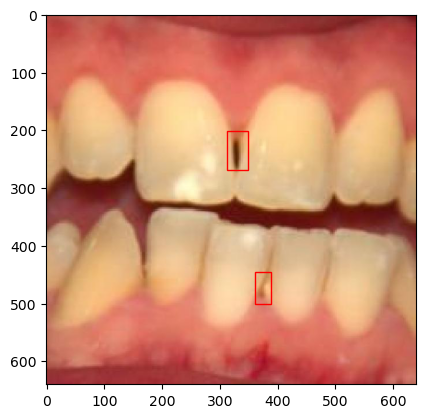

[262.75, 360.25, 28.5, 45.5]
[365.5, 360.0, 40.0, 57.0]
[468.75, 385.5, 31.5, 63.0]


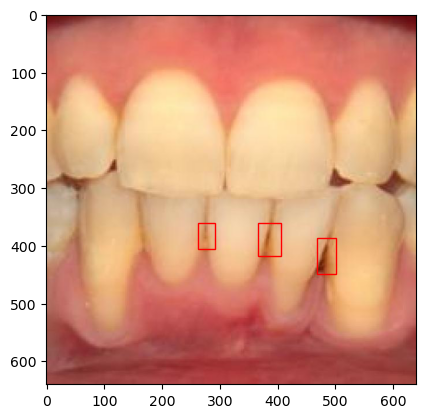

[402.25, 290.75, 16.5, 25.5]


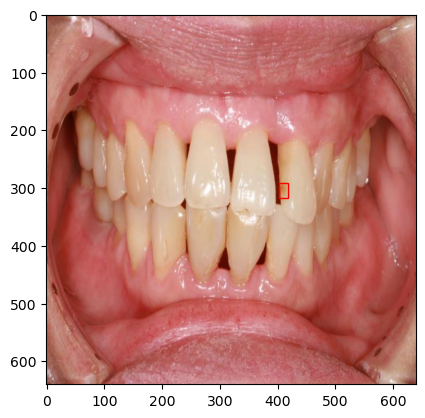

[251.0, 126.0, 51.0, 33.0]
[132.5, 97.0, 46.0, 63.0]
[88.75, 115.75, 26.5, 72.5]
[474.25, 118.25, 30.5, 58.5]
[57.75, 155.25, 28.5, 36.5]


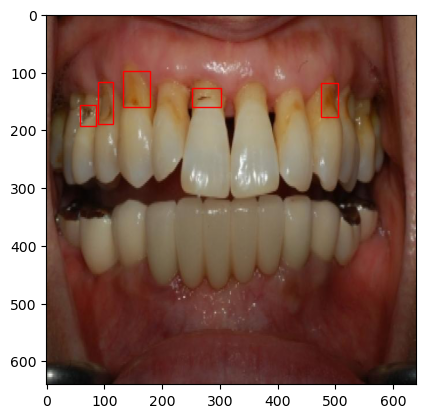

[28.412974499999997, 100.4796515, 87.778329, 213.176909, '0.13683500625', '0.2759746140625', '0.15985398125', '0.2615565296875', '0.19029620625000002', '0.26106338125', '0.230499753125', '0.308632684375', '0.25419474062499997', '0.3170356609375', '0.26124338593749996', '0.269102990625', '0.20955188281249998', '0.24530860468750001', '0.138858746875', '0.214441446875', '0.112403721875', '0.24731364218750002', '0.1129720921875', '0.323543915625']


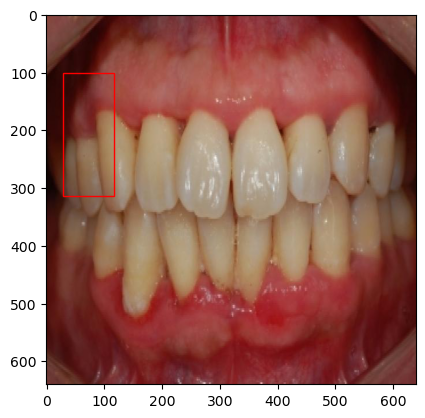

[48.25, 266.25, 12.5, 24.5]


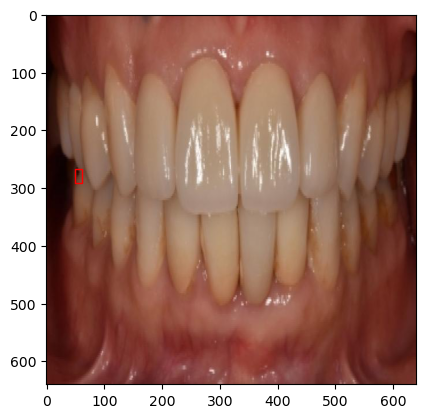

[394.5, 410.0, 21.0, 58.0]
[320.5, 233.5, 29.0, 69.0]
[208.75, 412.25, 18.5, 54.5]
[222.75, 282.5, 9.5, 71.0]


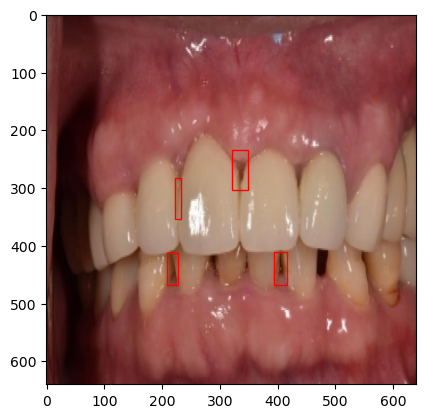

[141.25, 455.25, 39.5, 66.5]
[55.25, 171.75, 40.5, 62.5]


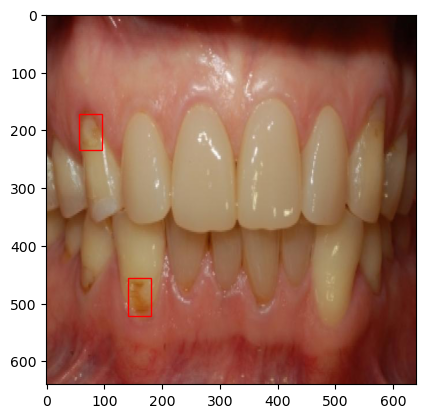

[129.75, 347.25, 26.5, 60.5]
[549.0, 217.75, 19.0, 28.5]
[549.0, 308.5, 13.0, 29.0]
[503.5, 192.75, 20.0, 31.5]


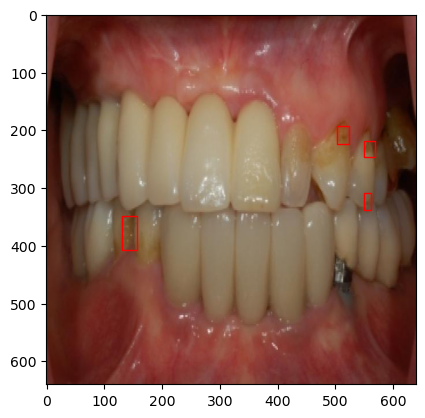

[185.0, 279.5, 24.0, 36.0]
[195.25, 414.0, 33.5, 82.0]


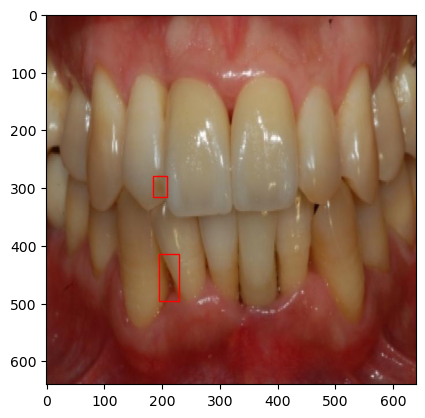

[502.5, 353.5, 43.0, 56.0]


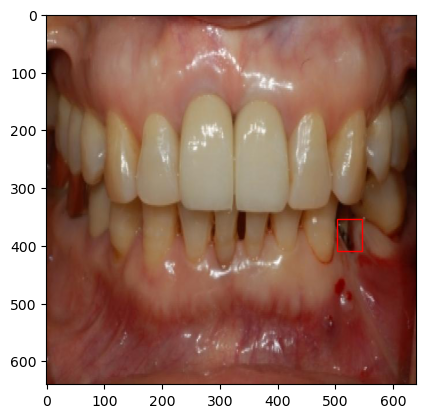

[320.75, 337.25, 65.5, 35.5]


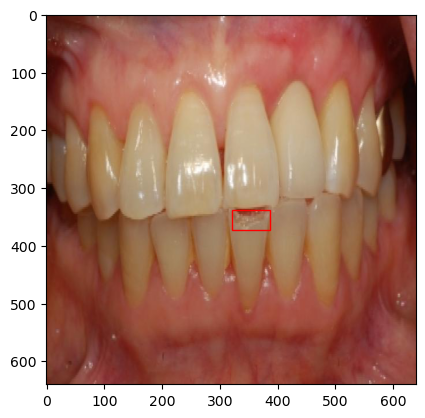

[459.75, 483.75, 38.5, 40.5]
[541.0, 186.5, 20.0, 24.0]
[92.25, 401.25, 18.5, 32.5]


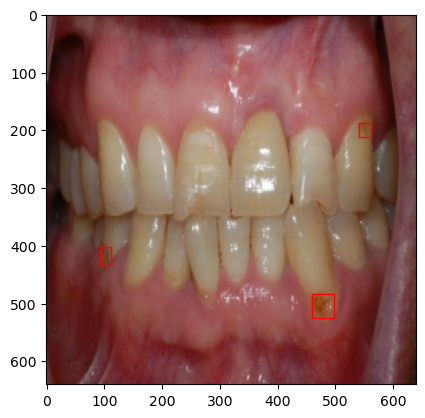

[463.25, 420.75, 49.5, 64.5]


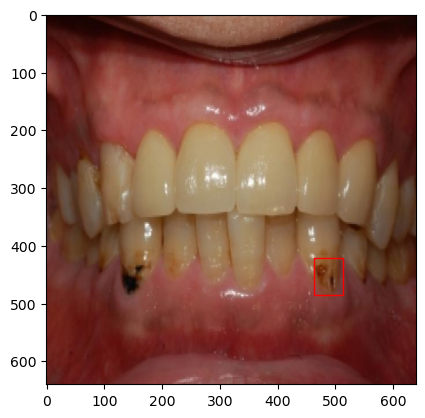

In [8]:
# Пройдемся по всем файлам с разметкой.
# Изображения могут иметь разный формат, это тоже учтём.

for file_name in tr_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in tr_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in tr_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_tr_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_tr_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    